In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from glob import glob
import pandas as pd
import os

# Define the path to the dataset
data_path = '/content/drive/MyDrive/Dataset'

# Dictionary to store counts
class_counts = {}

# Traverse each main class folder
for main_class_folder in os.listdir(data_path):
    main_class_path = os.path.join(data_path, main_class_folder)
    if os.path.isdir(main_class_path):
        total_images = 0
        # Traverse each subtype (subfolder)
        for subtype_folder in os.listdir(main_class_path):
            subtype_path = os.path.join(main_class_path, subtype_folder)
            if os.path.isdir(subtype_path):
                # Count images in the subtype folder
                num_images = len(glob(subtype_path + '/*'))
                total_images += num_images
                print(f"{main_class_folder} - {subtype_folder}: {num_images} images")
        class_counts[main_class_folder] = total_images

# Display the total number of images per main class
class_counts_df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Total Number of Images'])
print("\nTotal images per main class:")
print(class_counts_df)


Igneous - Basalt: 5 images
Igneous - Granite: 88 images
Metamorphic - Marble: 387 images
Metamorphic - Quartzite: 477 images
Sedimentary - Coal: 369 images
Sedimentary - Limestone: 338 images
Sedimentary - Sandstone: 325 images

Total images per main class:
         Class  Total Number of Images
0      Igneous                      93
1  Metamorphic                     864
2  Sedimentary                    1032


In [ ]:
import os
import shutil

# Path to the dataset
data_path = '/content/drive/MyDrive/Dataset'

# Traverse each main class folder
for main_class_folder in os.listdir(data_path):
    main_class_path = os.path.join(data_path, main_class_folder)
    if os.path.isdir(main_class_path):
        # Traverse each subtype folder within the main class folder
        for subtype_folder in os.listdir(main_class_path):
            subtype_path = os.path.join(main_class_path, subtype_folder)
            if os.path.isdir(subtype_path):
                # Move each image file to the main class folder with a unique name
                for image_file in os.listdir(subtype_path):
                    image_path = os.path.join(subtype_path, image_file)
                    # Create a unique filename with the subtype prefix
                    new_filename = f"{subtype_folder}_{image_file}"
                    new_image_path = os.path.join(main_class_path, new_filename)

                    # Move the file with the new unique name
                    shutil.move(image_path, new_image_path)

                # Remove the now-empty subtype folder
                os.rmdir(subtype_path)

print("Folder structure flattened. All images moved to main class folders with unique filenames.")


Folder structure flattened. All images moved to main class folders with unique filenames.


In [ ]:
import os
import shutil

# Path to the dataset
data_path = '/content/drive/MyDrive/Dataset'

# Traverse each main class folder
for main_class_folder in os.listdir(data_path):
    main_class_path = os.path.join(data_path, main_class_folder)
    if os.path.isdir(main_class_path):
        # Traverse each subtype folder within the main class folder
        for subtype_folder in os.listdir(main_class_path):
            subtype_path = os.path.join(main_class_path, subtype_folder)
            if os.path.isdir(subtype_path):
                # Move each image file to the main class folder with a unique name
                for image_file in os.listdir(subtype_path):
                    image_path = os.path.join(subtype_path, image_file)
                    # Create a unique filename with the subtype prefix
                    new_filename = f"{subtype_folder}_{image_file}"
                    new_image_path = os.path.join(main_class_path, new_filename)

                    # Move the file with the new unique name
                    shutil.move(image_path, new_image_path)

                # Remove the now-empty subtype folder
                os.rmdir(subtype_path)

print("Folder structure flattened. All images moved to main class folders with unique filenames.")


Folder structure flattened. All images moved to main class folders with unique filenames.


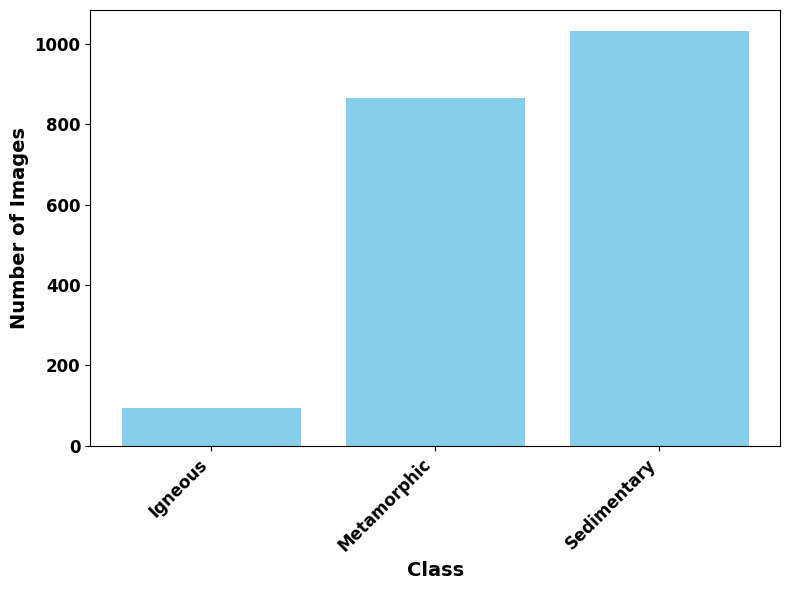

In [ ]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts_df['Class'], class_counts_df['Total Number of Images'], color='skyblue')
plt.xlabel('Class', fontsize=14, fontweight='bold')
plt.ylabel('Number of Images', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


Image Width - min: 77, max: 5472, mean: 490.58019105077926
Image Height - min: 58, max: 6720, mean: 367.4972347913524


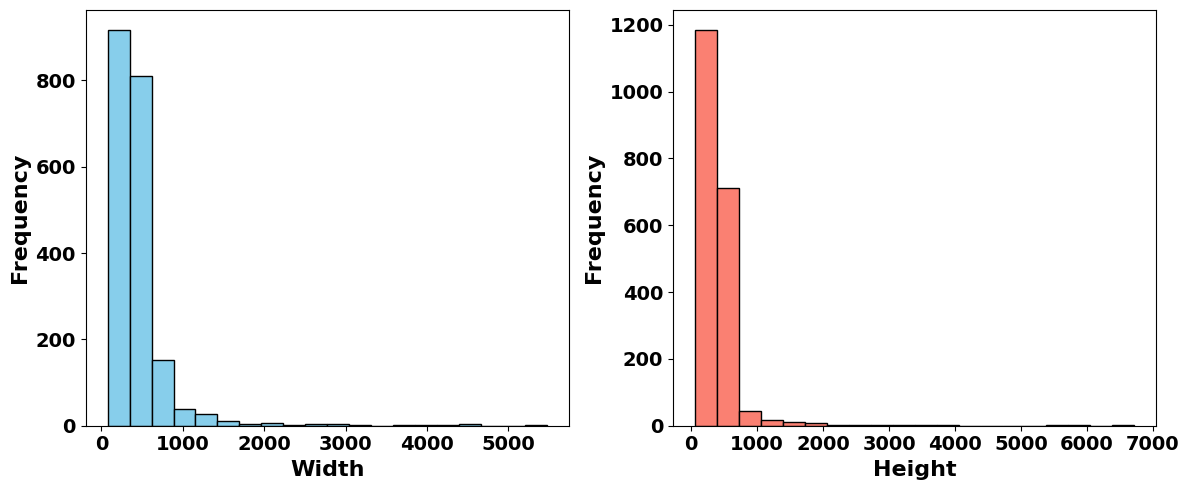

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# List to store image sizes
image_sizes = []

# Traverse each class folder and record each image's size
for main_class_folder in os.listdir(data_path):
    main_class_path = os.path.join(data_path, main_class_folder)
    if os.path.isdir(main_class_path):
        for image_file in os.listdir(main_class_path):
            image_path = os.path.join(main_class_path, image_file)
            with Image.open(image_path) as img:
                image_sizes.append(img.size)  # (width, height)

# Convert to array and calculate statistics
image_sizes = np.array(image_sizes)
widths, heights = image_sizes[:, 0], image_sizes[:, 1]

# Display size statistics
print(f"Image Width - min: {widths.min()}, max: {widths.max()}, mean: {widths.mean()}")
print(f"Image Height - min: {heights.min()}, max: {heights.max()}, mean: {heights.mean()}")

# Plot distributions of widths and heights
plt.figure(figsize=(12, 5))

# Plot width distribution
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Width', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

# Plot height distribution
plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='salmon', edgecolor='black')
plt.xlabel('Height', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


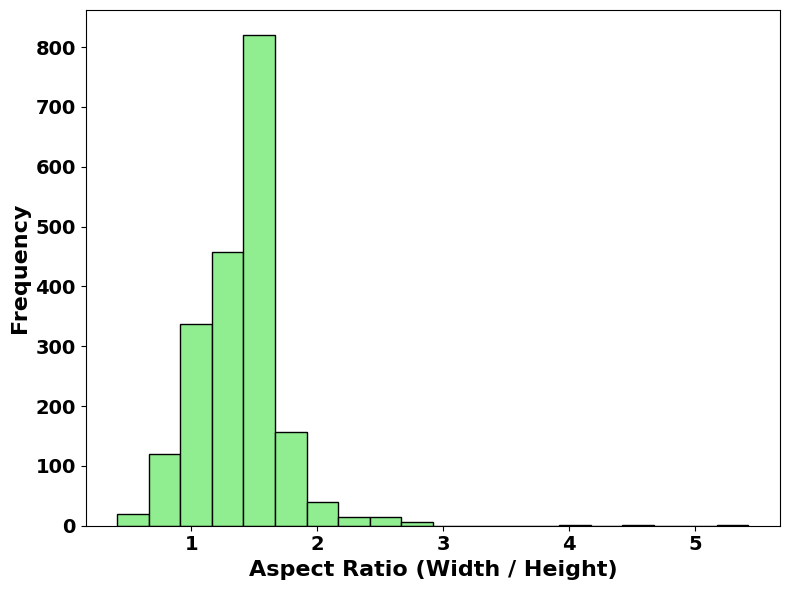

Aspect Ratio - min: 0.41260744985673353, max: 5.422857142857143, mean: 1.3813891591846816


In [ ]:
# Calculate aspect ratios
aspect_ratios = widths / heights

# Plot aspect ratio distribution
plt.figure(figsize=(8, 6))
plt.hist(aspect_ratios, bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Aspect Ratio (Width / Height)', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Display aspect ratio statistics
print(f"Aspect Ratio - min: {aspect_ratios.min()}, max: {aspect_ratios.max()}, mean: {aspect_ratios.mean()}")


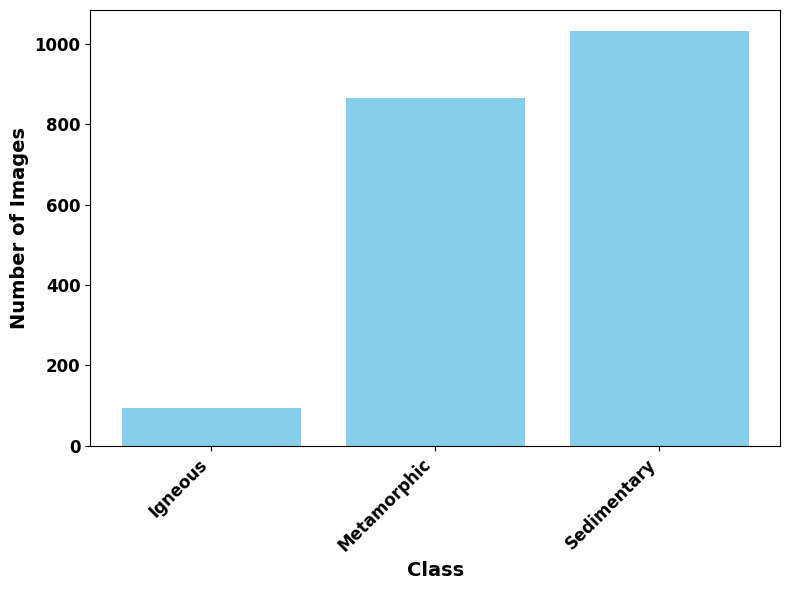

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'class_counts_df' contains the cleaned class distribution data
# Plot class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts_df['Class'], class_counts_df['Total Number of Images'], color='skyblue')
plt.xlabel('Class', fontsize=14, fontweight='bold')
plt.ylabel('Number of Images', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
pip install ImageHash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 43.1 MB/s eta 0:00:00


In [ ]:
import os
import imagehash
from PIL import Image, UnidentifiedImageError

# Define the path to the dataset
data_path = '/content/drive/MyDrive/Dataset'

# Function to calculate hash of an image
def calculate_image_hash(image_path):
    try:
        with Image.open(image_path) as img:
            return imagehash.phash(img)
    except UnidentifiedImageError:
        print(f"Skipping non-image file or corrupted image: {image_path}")
        return None
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Function to remove duplicates based on hash comparison
def remove_duplicates(data_path):
    hashes = {}
    removed_files = []

    for main_class_folder in os.listdir(data_path):
        main_class_path = os.path.join(data_path, main_class_folder)

        if os.path.isdir(main_class_path):
            for image_file in os.listdir(main_class_path):
                image_path = os.path.join(main_class_path, image_file)

                # Skip non-image files
                if not image_file.endswith(('.jpg', '.png', '.jpeg')):
                    continue

                # Calculate hash of the image
                image_hash = calculate_image_hash(image_path)

                if image_hash is None:
                    continue  # Skip files that couldn't be processed

                # Check if hash already exists (indicating duplicate)
                if image_hash in hashes:
                    print(f"Duplicate detected: {image_file}")
                    os.remove(image_path)  # Remove the duplicate
                    removed_files.append(image_file)
                else:
                    hashes[image_hash] = image_path

    print(f"Total duplicates removed: {len(removed_files)}")

# Call the function to remove duplicates
remove_duplicates(data_path)


Skipping non-image file or corrupted image: /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg
Duplicate detected: Quartzite_istockphoto-929779624-612x612.jpg
Duplicate detected: Quartzite_quartzite1 (1).jpg
Duplicate detected: Quartzite_QuartziteGrayGreenCUp.jpg
Duplicate detected: Marble_1 (33).jpg
Duplicate detected: Marble_1 (34).jpg
Duplicate detected: Marble_1 (570).jpg
Duplicate detected: Marble_31e2cae7a399bd4322fc2f0a8351995e.jpg
Duplicate detected: Marble_1 (598).jpg
Duplicate detected: Marble_1 (597).jpg
Duplicate detected: Marble_15169970468_ef3c6b5bff_b.jpg
Duplicate detected: Marble_1 (7).jpg
Duplicate detected: Marble_MarbleWhite.jpg
Duplicate detected: Marble_marble2020(7).jpg
Duplicate detected: Marble_marble2020(6).jpg
Duplicate detected: Marble_marble-with-ruby.jpg
Duplicate detected: Marble_Marble-from-Fauske.jpg
Duplicate detected: Marble_s-l400.jpg
Duplicate detected: Sandstone_165.jpg
Duplicate detected: Sandstone_249.jpg
Duplicate detected: San

In [ ]:
import os
import imagehash
from PIL import Image, UnidentifiedImageError
import logging

# Set up logging
logging.basicConfig(filename='/content/drive/MyDrive/Dataset/removal_log.txt', level=logging.INFO)

# Define the path to the dataset
data_path = '/content/drive/MyDrive/Dataset'

# Function to calculate hash of an image
def calculate_image_hash(image_path):
    try:
        with Image.open(image_path) as img:
            return imagehash.phash(img)
    except UnidentifiedImageError:
        print(f"Skipping non-image file or corrupted image: {image_path}")
        return None
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Function to remove duplicates based on hash comparison
def remove_duplicates(data_path):
    hashes = {}
    removed_files = []

    for main_class_folder in os.listdir(data_path):
        main_class_path = os.path.join(data_path, main_class_folder)

        if os.path.isdir(main_class_path):
            for image_file in os.listdir(main_class_path):
                image_path = os.path.join(main_class_path, image_file)

                # Skip non-image files
                if not image_file.endswith(('.jpg', '.png', '.jpeg')):
                    continue

                # Calculate hash of the image
                image_hash = calculate_image_hash(image_path)

                # If the hash already exists, remove the image
                if image_hash in hashes:
                    print(f"Duplicate detected: {image_file}")
                    logging.info(f"Duplicate removed: {image_path} | Hash: {image_hash}")
                    os.remove(image_path)  # Remove the duplicate
                    removed_files.append(image_file)
                else:
                    hashes[image_hash] = image_path

    print(f"Total duplicates removed: {len(removed_files)}")
    logging.info(f"Total duplicates removed: {len(removed_files)}")

# Call the function to remove duplicates
remove_duplicates(data_path)


Skipping non-image file or corrupted image: /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg
Total duplicates removed: 0


In [ ]:
from PIL import Image
import os

# Define the target size for resizing
target_size = (224, 224)  # Resize images to 224x224 (common in models like VGG16)

# Define the directory path for the dataset
data_path = '/content/drive/MyDrive/Dataset'

# Function to resize and convert images
def resize_images(data_path, target_size):
    for main_class_folder in os.listdir(data_path):
        main_class_path = os.path.join(data_path, main_class_folder)

        if os.path.isdir(main_class_path):
            for image_file in os.listdir(main_class_path):
                image_path = os.path.join(main_class_path, image_file)

                # Ensure we are processing valid image files
                if image_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                    try:
                        with Image.open(image_path) as img:
                            # Convert image mode to 'RGB' if it's in 'P' or other non-RGB modes
                            if img.mode != 'RGB':
                                img = img.convert('RGB')

                            # Resize the image
                            img_resized = img.resize(target_size)

                            # Save the resized image (overwriting the original image)
                            img_resized.save(image_path)
                            print(f"Resized {image_file} to {target_size}")
                    except Exception as e:
                        print(f"Error processing {image_file}: {e}")

# Call the resize function
resize_images(data_path, target_size)


Resized Granite_87.png to (224, 224)
Resized Granite_66.jpg to (224, 224)
Resized Granite_24.png to (224, 224)
Resized Granite_31.jpg to (224, 224)
Resized Granite_25.png to (224, 224)
Resized Basalt_rosen-kazlachev-full.jpg to (224, 224)
Resized Basalt_44.jpg to (224, 224)
Resized Basalt_31.png to (224, 224)
Resized Basalt_11.jpg to (224, 224)
Resized Basalt_26.jpg to (224, 224)
Resized Granite_27.jpeg to (224, 224)
Resized Granite_26.png to (224, 224)
Resized Granite_23.jpeg to (224, 224)
Resized Granite_22.jpg to (224, 224)
Resized Granite_10.jpg to (224, 224)
Resized Granite_1.jpg to (224, 224)
Resized Granite_11.jpg to (224, 224)
Resized Granite_12.jpg to (224, 224)
Resized Granite_21.jpg to (224, 224)
Resized Granite_20.jpg to (224, 224)
Resized Granite_100.jpg to (224, 224)
Resized Granite_18.jpg to (224, 224)
Resized Granite_17.jpg to (224, 224)
Resized Granite_19.jpg to (224, 224)
Resized Granite_16.jpg to (224, 224)
Resized Granite_15.jpg to (224, 224)
Resized Granite_14.jpg 

In [ ]:
import numpy as np
from PIL import Image
import os

# Function to normalize the image pixels
def normalize_images(data_path):
    for main_class_folder in os.listdir(data_path):
        main_class_path = os.path.join(data_path, main_class_folder)

        if os.path.isdir(main_class_path):
            for image_file in os.listdir(main_class_path):
                image_path = os.path.join(main_class_path, image_file)

                # Ensure we're processing valid image files
                if image_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                    try:
                        with Image.open(image_path) as img:
                            # Convert the image to RGB (if it's not already)
                            img = img.convert('RGB')

                            # Convert image to numpy array
                            img_array = np.array(img)

                            # Normalize the image to range [0, 1]
                            img_normalized = img_array / 255.0

                            # Convert the normalized image back to [0, 255] and convert to uint8
                            img_normalized = Image.fromarray((img_normalized * 255).astype(np.uint8))

                            # Save the normalized image
                            img_normalized.save(image_path)  # Overwrite the original image
                            print(f"Normalized {image_file}")
                    except Exception as e:
                        print(f"Error processing {image_file}: {e}")

# Call the normalization function
normalize_images(data_path)


Normalized Granite_87.png
Normalized Granite_66.jpg
Normalized Granite_24.png
Normalized Granite_31.jpg
Normalized Granite_25.png
Normalized Basalt_rosen-kazlachev-full.jpg
Normalized Basalt_44.jpg
Normalized Basalt_31.png
Normalized Basalt_11.jpg
Normalized Basalt_26.jpg
Normalized Granite_27.jpeg
Normalized Granite_26.png
Normalized Granite_23.jpeg
Normalized Granite_22.jpg
Normalized Granite_10.jpg
Normalized Granite_1.jpg
Normalized Granite_11.jpg
Normalized Granite_12.jpg
Normalized Granite_21.jpg
Normalized Granite_20.jpg
Normalized Granite_100.jpg
Normalized Granite_18.jpg
Normalized Granite_17.jpg
Normalized Granite_19.jpg
Normalized Granite_16.jpg
Normalized Granite_15.jpg
Normalized Granite_14.jpg
Normalized Granite_13.jpg
Normalized Granite_50.jpg
Normalized Granite_5.jpg
Normalized Granite_46.jpg
Normalized Granite_47.jpg
Normalized Granite_48.jpg
Normalized Granite_49.jpg
Normalized Granite_41.jpg
Normalized Granite_3.jpg
Normalized Granite_28.jpg
Normalized Granite_30.jpg

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Initialize the model
model = Sequential()

# Add convolutional layers with max pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten the layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes remaining

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
import shutil

# Define the path to the dataset
data_path = '/content/drive/MyDrive/Dataset'

# Function to remove "Igneous" images
def remove_igneous(data_path):
    for main_class_folder in os.listdir(data_path):
        if main_class_folder == 'Igneous':  # Only target the Igneous class
            class_path = os.path.join(data_path, main_class_folder)
            for image_file in os.listdir(class_path):
                image_path = os.path.join(class_path, image_file)
                if os.path.isfile(image_path):
                    os.remove(image_path)
            print(f"Removed all images from {main_class_folder}")

# Call the function to remove "Igneous" images
remove_igneous(data_path)


Removed all images from Igneous


In [ ]:
import os

# List all directories (i.e., class folders) in your dataset path
data_path = '/content/drive/MyDrive/Dataset'
print("Remaining classes:", os.listdir(data_path))


Remaining classes: ['Igneous', 'Metamorphic', 'Sedimentary']


In [ ]:
import shutil

# List all class directories to remove the Igneous folder
igneous_dir = os.path.join(data_path, 'Igneous')
if os.path.exists(igneous_dir):
    shutil.rmtree(igneous_dir)
    print("Removed 'Igneous' folder.")


Removed 'Igneous' folder.


In [ ]:
for main_class_folder in os.listdir(data_path):
    main_class_path = os.path.join(data_path, main_class_folder)
    if os.path.isdir(main_class_path):
        total_images = len([f for f in os.listdir(main_class_path) if f.endswith(('.jpg', '.png', '.jpeg'))])
        print(f"{main_class_folder}: {total_images} images")


Metamorphic: 840 images
Sedimentary: 955 images


In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import Sequence
import numpy as np
from tensorflow.keras.utils import to_categorical

class CustomImageDataGenerator(Sequence):
    def __init__(self, directory, batch_size=32, target_size=(224, 224), shuffle=True):
        self.directory = directory
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.class_names = sorted(os.listdir(directory))  # Get sorted class names (alphabetical)
        self.class_indices = {class_name: index for index, class_name in enumerate(self.class_names)}
        self.image_paths = self._get_image_paths()
        self.on_epoch_end()

    def _get_image_paths(self):
        image_paths = []
        for class_name in self.class_names:
            class_path = os.path.join(self.directory, class_name)
            if os.path.isdir(class_path):
                for image_name in os.listdir(class_path):
                    image_path = os.path.join(class_path, image_name)
                    image_paths.append((image_path, class_name))
        return image_paths

    def __len__(self):
        return int(np.floor(len(self.image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_paths = self.image_paths[index*self.batch_size:(index+1)*self.batch_size]
        images = []
        labels = []

        for image_path, label in batch_paths:
            try:
                # Load and resize the image
                img = load_img(image_path, target_size=self.target_size)
                img_array = img_to_array(img) / 255.0  # Normalize the image
                images.append(img_array)

                # Convert label to numerical index and then one-hot encode
                label_index = self.class_indices[label]
                labels.append(label_index)

            except Exception as e:
                print(f"Error processing image {image_path}: {e}")
                continue

        # Convert lists to numpy arrays and one-hot encode labels
        images = np.array(images)
        labels = to_categorical(np.array(labels), num_classes=len(self.class_names))

        return images, labels

    def on_epoch_end(self):
        # Shuffle the dataset after each epoch
        if self.shuffle:
            np.random.shuffle(self.image_paths)

# Now, create the generator instance
train_generator = CustomImageDataGenerator(directory='/content/drive/MyDrive/Dataset', batch_size=32, target_size=(224, 224))

# Train the model using the custom generator
history_cnn = model_cnn.fit(train_generator, epochs=10)


Epoch 1/10
 2/56 ━━━━━━━━━━━━━━━━━━━━ 3:57 4s/step - accuracy: 0.5781 - loss: 0.7949Error processing image /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg: cannot identify image file <_io.BytesIO object at 0x7b8687808770>
56/56 ━━━━━━━━━━━━━━━━━━━━ 223s 4s/step - accuracy: 0.5675 - loss: 0.8893
Epoch 2/10
30/56 ━━━━━━━━━━━━━━━━━━━━ 1:42 4s/step - accuracy: 0.6639 - loss: 0.6134Error processing image /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg: cannot identify image file <_io.BytesIO object at 0x7b8679087420>
56/56 ━━━━━━━━━━━━━━━━━━━━ 260s 4s/step - accuracy: 0.6656 - loss: 0.6165
Epoch 3/10
 5/56 ━━━━━━━━━━━━━━━━━━━━ 3:15 4s/step - accuracy: 0.6634 - loss: 0.5744Error processing image /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg: cannot identify image file <_io.BytesIO object at 0x7b867909c6d0>
56/56 ━━━━━━━━━━━━━━━━━━━━ 221s 4s/step - accuracy: 0.6811 - loss: 0.5834
Epoch 4/10
46/56 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step

In [ ]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import Sequence
import numpy as np
from tensorflow.keras.utils import to_categorical

class CustomImageDataGenerator(Sequence):
    def __init__(self, directory, batch_size=32, target_size=(224, 224), shuffle=True, validation_split=0.2):
        self.directory = directory
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.validation_split = validation_split

        self.class_names = sorted(os.listdir(directory))  # Get sorted class names (alphabetical)
        self.class_indices = {class_name: index for index, class_name in enumerate(self.class_names)}

        # Split the data paths into training and validation based on the validation split
        self.image_paths = self._get_image_paths()

        # Create separate lists for train and validation
        self.train_image_paths, self.val_image_paths = self._train_val_split()

        # Create indices for training and validation data
        self.on_epoch_end()

    def _get_image_paths(self):
        image_paths = []
        for class_name in self.class_names:
            class_path = os.path.join(self.directory, class_name)
            if os.path.isdir(class_path):
                for image_name in os.listdir(class_path):
                    image_path = os.path.join(class_path, image_name)
                    image_paths.append((image_path, class_name))
        return image_paths

    def _train_val_split(self):
        # Shuffle and split the dataset into training and validation sets
        num_val_samples = int(len(self.image_paths) * self.validation_split)
        np.random.shuffle(self.image_paths)
        train_paths = self.image_paths[num_val_samples:]
        val_paths = self.image_paths[:num_val_samples]
        return train_paths, val_paths

    def __len__(self):
        return int(np.floor(len(self.train_image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_paths = self.train_image_paths[index * self.batch_size:(index + 1) * self.batch_size]
        images = []
        labels = []

        for image_path, label in batch_paths:
            try:
                # Load and resize the image
                img = load_img(image_path, target_size=self.target_size)
                img_array = img_to_array(img) / 255.0  # Normalize the image
                images.append(img_array)

                # Convert label to numerical index and then one-hot encode
                label_index = self.class_indices[label]
                labels.append(label_index)
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

        return np.array(images), to_categorical(np.array(labels), num_classes=len(self.class_names))

    def on_epoch_end(self):
        # Shuffle the data at the end of each epoch if shuffle is enabled
        if self.shuffle:
            np.random.shuffle(self.train_image_paths)

    def validation_data(self):
        # Return validation data as a generator
        val_generator = CustomImageDataGenerator(self.directory,
                                                 batch_size=self.batch_size,
                                                 target_size=self.target_size,
                                                 shuffle=False,
                                                 validation_split=self.validation_split)
        val_generator.train_image_paths = self.val_image_paths  # Only use validation paths for validation
        return val_generator


In [ ]:
# Initialize the custom data generator
train_generator = CustomImageDataGenerator(directory=data_path, batch_size=32, validation_split=0.2)

# Train the model
history_cnn = model_cnn.fit(
    train_generator,  # Train on the training set
    epochs=10,
    validation_data=train_generator.validation_data()  # Use validation data
)


Epoch 1/10
34/45 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.9150 - loss: 0.2215Error processing image /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg: cannot identify image file <_io.BytesIO object at 0x7b86879df100>
45/45 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - accuracy: 0.9142 - loss: 0.2235 - val_accuracy: 0.9148 - val_loss: 0.1835
Epoch 2/10
Error processing image /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg: cannot identify image file <_io.BytesIO object at 0x7b86798c2ca0>
45/45 ━━━━━━━━━━━━━━━━━━━━ 191s 4s/step - accuracy: 0.9051 - loss: 0.2381 - val_accuracy: 0.9347 - val_loss: 0.1742
Epoch 3/10
18/45 ━━━━━━━━━━━━━━━━━━━━ 1:46 4s/step - accuracy: 0.8929 - loss: 0.2087Error processing image /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg: cannot identify image file <_io.BytesIO object at 0x7b86798d97b0>
45/45 ━━━━━━━━━━━━━━━━━━━━ 209s 4s/step - accuracy: 0.9095 - loss: 0.1941 - val_accuracy: 0.9347 - val_loss: 0.17

Previous model overfitting

In [ ]:
class CustomImageDataGenerator(Sequence):
    def __init__(self, directory, batch_size=32, target_size=(224, 224), shuffle=True, validation_split=0.2):
        self.directory = directory
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.validation_split = validation_split

        self.class_names = sorted(os.listdir(directory))  # Get sorted class names (alphabetical)
        self.class_indices = {class_name: index for index, class_name in enumerate(self.class_names)}

        # Split the data paths into training and validation based on the validation split
        self.image_paths = self._get_image_paths()

        # Create separate lists for train and validation
        self.train_image_paths, self.val_image_paths = self._train_val_split()

        # Create indices for training and validation data
        self.on_epoch_end()

    def _get_image_paths(self):
        image_paths = []
        for class_name in self.class_names:
            class_path = os.path.join(self.directory, class_name)
            if os.path.isdir(class_path):
                for image_name in os.listdir(class_path):
                    image_path = os.path.join(class_path, image_name)
                    image_paths.append((image_path, class_name))
        return image_paths

    def _train_val_split(self):
        # Shuffle and split the dataset into training and validation sets
        num_val_samples = int(len(self.image_paths) * self.validation_split)
        np.random.shuffle(self.image_paths)
        train_paths = self.image_paths[num_val_samples:]
        val_paths = self.image_paths[:num_val_samples]
        return train_paths, val_paths

    def __len__(self):
        return int(np.floor(len(self.train_image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_paths = self.train_image_paths[index * self.batch_size:(index + 1) * self.batch_size]
        images = []
        labels = []

        for image_path, label in batch_paths:
            try:
                # Load and resize the image
                img = load_img(image_path, target_size=self.target_size)
                img_array = img_to_array(img) / 255.0  # Normalize the image
                images.append(img_array)

                # Convert label to numerical index and then one-hot encode
                label_index = self.class_indices[label]
                labels.append(label_index)

            except Exception as e:
                print(f"Error processing image {image_path}: {e}")
                continue  # Skip this image if it can't be processed

        return np.array(images), to_categorical(labels, num_classes=len(self.class_names))

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.train_image_paths)

    # Validation generator
    def validation_data(self):
        val_images = []
        val_labels = []

        for image_path, label in self.val_image_paths:
            try:
                # Load and resize the image
                img = load_img(image_path, target_size=self.target_size)
                img_array = img_to_array(img) / 255.0  # Normalize the image
                val_images.append(img_array)

                # Convert label to numerical index and then one-hot encode
                label_index = self.class_indices[label]
                val_labels.append(label_index)

            except Exception as e:
                print(f"Error processing image {image_path}: {e}")
                continue  # Skip this image if it can't be processed

        return np.array(val_images), to_categorical(val_labels, num_classes=len(self.class_names))


In [ ]:
history_cnn = model_cnn.fit(
    train_generator,
    epochs=10,
    validation_data=train_generator.validation_data()  # Use validation data
)


Epoch 1/10
23/45 ━━━━━━━━━━━━━━━━━━━━ 1:27 4s/step - accuracy: 0.9745 - loss: 0.0600Error processing image /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg: cannot identify image file <_io.BytesIO object at 0x7b86799116c0>
45/45 ━━━━━━━━━━━━━━━━━━━━ 192s 4s/step - accuracy: 0.9736 - loss: 0.0612 - val_accuracy: 0.8807 - val_loss: 0.3171
Epoch 2/10
11/45 ━━━━━━━━━━━━━━━━━━━━ 2:30 4s/step - accuracy: 0.9625 - loss: 0.1901Error processing image /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg: cannot identify image file <_io.BytesIO object at 0x7b86799127f0>
45/45 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.9618 - loss: 0.1307 - val_accuracy: 0.8949 - val_loss: 0.2829
Epoch 3/10
12/45 ━━━━━━━━━━━━━━━━━━━━ 2:05 4s/step - accuracy: 0.9804 - loss: 0.0558Error processing image /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg: cannot identify image file <_io.BytesIO object at 0x7b86799118f0>
45/45 ━━━━━━━━━━━━━━━━━━━━ 196s 4s/step


# Are These Results Better or Worse?
Without previous results for comparison, here’s how this performance can be judged:

Strengths:
High training accuracy indicates the model is learning the training data well.
Validation accuracy (~88-89%) is reasonably high and shows the model can generalize to some extent.
Weaknesses:
Overfitting is evident due to the widening gap between training and validation metrics.
Validation loss does not improve consistently, indicating difficulty in generalizing to unseen data.

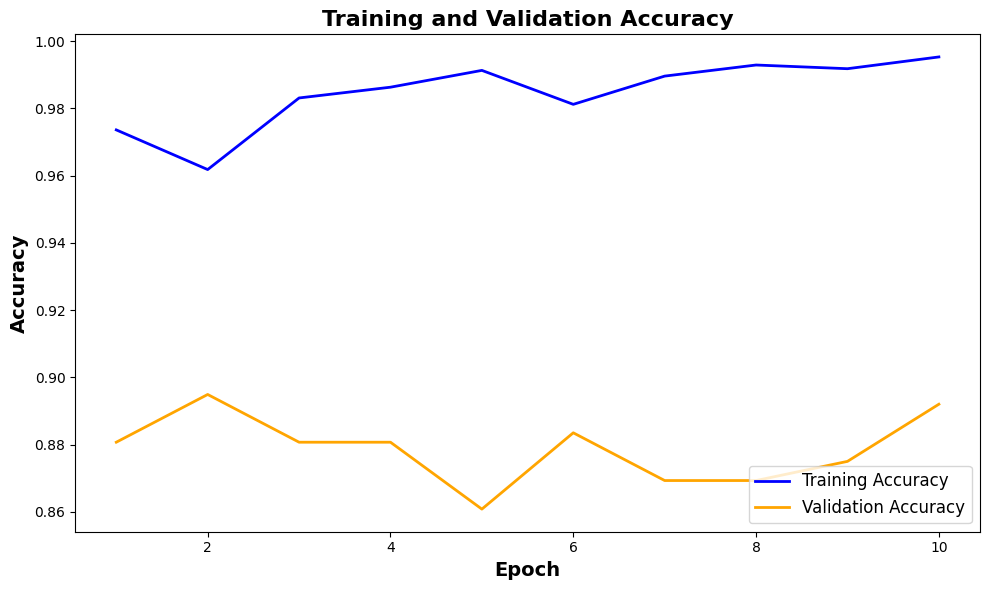

In [ ]:
import matplotlib.pyplot as plt

# Data from the provided results
epochs = range(1, 11)
train_accuracy = [0.9736, 0.9618, 0.9831, 0.9863, 0.9913, 0.9812, 0.9896, 0.9929, 0.9918, 0.9953]
val_accuracy = [0.8807, 0.8949, 0.8807, 0.8807, 0.8608, 0.8835, 0.8693, 0.8693, 0.8750, 0.8920]

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue', linewidth=2)
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange', linewidth=2)

plt.xlabel('Epoch', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.title('Training and Validation Accuracy', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()



# What Does This Mean?
The model is learning patterns in the training data well, as seen from the nearly perfect training accuracy.
However, its ability to generalize to unseen data is limited, as evidenced by the slower increase and plateauing of validation accuracy.
This behavior is typical when the model is too complex for the amount or variability of the training data. The consistent gap could also indicate that the model is learning spurious correlations in the training set, which do not translate well to the validation set.

In [ ]:
class CustomImageDataGenerator(Sequence):
    def __init__(self, directory, batch_size=32, target_size=(224, 224), shuffle=True, validation_split=0.2):
        self.directory = directory
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.validation_split = validation_split

        self.class_names = sorted(os.listdir(directory))  # Get sorted class names (alphabetical)
        self.class_indices = {class_name: index for index, class_name in enumerate(self.class_names)}

        # Split the data paths into training and validation based on the validation split
        self.image_paths = self._get_image_paths()

        # Create separate lists for train and validation
        self.train_image_paths, self.val_image_paths = self._train_val_split()

        # Create indices for training and validation data
        self.on_epoch_end()

    def _get_image_paths(self):
        image_paths = []
        for class_name in self.class_names:
            class_path = os.path.join(self.directory, class_name)
            if os.path.isdir(class_path):
                for image_name in os.listdir(class_path):
                    image_path = os.path.join(class_path, image_name)
                    image_paths.append((image_path, class_name))
        return image_paths

    def _train_val_split(self):
        # Shuffle and split the dataset into training and validation sets
        num_val_samples = int(len(self.image_paths) * self.validation_split)
        np.random.shuffle(self.image_paths)
        train_paths = self.image_paths[num_val_samples:]
        val_paths = self.image_paths[:num_val_samples]
        return train_paths, val_paths

    def _load_image(self, image_path):
        try:
            # Load and resize the image
            img = load_img(image_path, target_size=self.target_size)
            img_array = img_to_array(img) / 255.0  # Normalize the image
            return img_array
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            return None

    def __getitem__(self, index):
        batch_paths = self.train_image_paths[index*self.batch_size:(index+1)*self.batch_size]
        images = []
        labels = []

        for image_path, label in batch_paths:
            img_array = self._load_image(image_path)

            if img_array is None:  # If image is corrupted, skip it
                continue

            images.append(img_array)

            # Convert label to numerical index
            label_index = self.class_indices[label]
            labels.append(label_index)

        # Convert labels to one-hot encoding
        labels = to_categorical(labels, num_classes=len(self.class_names))

        return np.array(images), np.array(labels)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.train_image_paths)
            np.random.shuffle(self.val_image_paths)

    def validation_data(self):
        # For validation, we'll return the validation set (if needed)
        return self.val_image_paths


In [ ]:
# Modify the CustomImageDataGenerator to include validation data method

class CustomImageDataGenerator(Sequence):
    def __init__(self, directory, batch_size=32, target_size=(224, 224), shuffle=True, validation_split=0.2):
        self.directory = directory
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.validation_split = validation_split

        self.class_names = sorted(os.listdir(directory))  # Get sorted class names (alphabetical)
        self.class_indices = {class_name: index for index, class_name in enumerate(self.class_names)}

        # Split the data paths into training and validation based on the validation split
        self.image_paths = self._get_image_paths()

        # Create separate lists for train and validation
        self.train_image_paths, self.val_image_paths = self._train_val_split()

        # Create indices for training and validation data
        self.on_epoch_end()

    def _get_image_paths(self):
        image_paths = []
        for class_name in self.class_names:
            class_path = os.path.join(self.directory, class_name)
            if os.path.isdir(class_path):
                for image_name in os.listdir(class_path):
                    image_path = os.path.join(class_path, image_name)
                    image_paths.append((image_path, class_name))
        return image_paths

    def _train_val_split(self):
        # Shuffle and split the dataset into training and validation sets
        num_val_samples = int(len(self.image_paths) * self.validation_split)
        np.random.shuffle(self.image_paths)
        train_paths = self.image_paths[num_val_samples:]
        val_paths = self.image_paths[:num_val_samples]
        return train_paths, val_paths

    def __len__(self):
        return int(np.floor(len(self.train_image_paths) / self.batch_size))

    def __getitem__(self, index):
        batch_paths = self.train_image_paths[index*self.batch_size:(index+1)*self.batch_size]
        images = []
        labels = []

        for image_path, label in batch_paths:
            try:
                # Load and resize the image
                img = load_img(image_path, target_size=self.target_size)
                img_array = img_to_array(img) / 255.0  # Normalize the image
                images.append(img_array)

                # Convert label to numerical index and then one-hot encode
                label_index = self.class_indices[label]
                labels.append(label_index)

            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

        images = np.array(images)
        labels = np.array(labels)
        return images, to_categorical(labels, num_classes=len(self.class_names))

    def validation_data(self):
        val_images = []
        val_labels = []

        for image_path, label in self.val_image_paths:
            try:
                # Load and resize the image
                img = load_img(image_path, target_size=self.target_size)
                img_array = img_to_array(img) / 255.0  # Normalize the image
                val_images.append(img_array)

                # Convert label to numerical index and then one-hot encode
                label_index = self.class_indices[label]
                val_labels.append(label_index)

            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

        val_images = np.array(val_images)
        val_labels = np.array(val_labels)
        return val_images, to_categorical(val_labels, num_classes=len(self.class_names))


In [ ]:
# Initialize the custom data generator
train_generator = CustomImageDataGenerator(directory=data_path, batch_size=32, validation_split=0.2)

# Train the model
history_simple_cnn = simple_cnn_model.fit(
    train_generator,  # Train on the training set
    epochs=10,
    validation_data=train_generator.validation_data()  # Use validation data
)


Epoch 1/10
36/45 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.5678 - loss: 0.6568Error processing image /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg: cannot identify image file <_io.BytesIO object at 0x7b8687d63ec0>
45/45 ━━━━━━━━━━━━━━━━━━━━ 196s 4s/step - accuracy: 0.5725 - loss: 0.6556 - val_accuracy: 0.7036 - val_loss: 0.6259
Epoch 2/10
15/45 ━━━━━━━━━━━━━━━━━━━━ 1:58 4s/step - accuracy: 0.6757 - loss: 0.6217Error processing image /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg: cannot identify image file <_io.BytesIO object at 0x7b86792ebab0>
45/45 ━━━━━━━━━━━━━━━━━━━━ 191s 4s/step - accuracy: 0.6713 - loss: 0.6166 - val_accuracy: 0.7008 - val_loss: 0.5789
Epoch 3/10
Error processing image /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg: cannot identify image file <_io.BytesIO object at 0x7b86792ebab0>
45/45 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.6957 - loss: 0.5548 - val_accuracy: 0.7396 - val_loss: 0.57

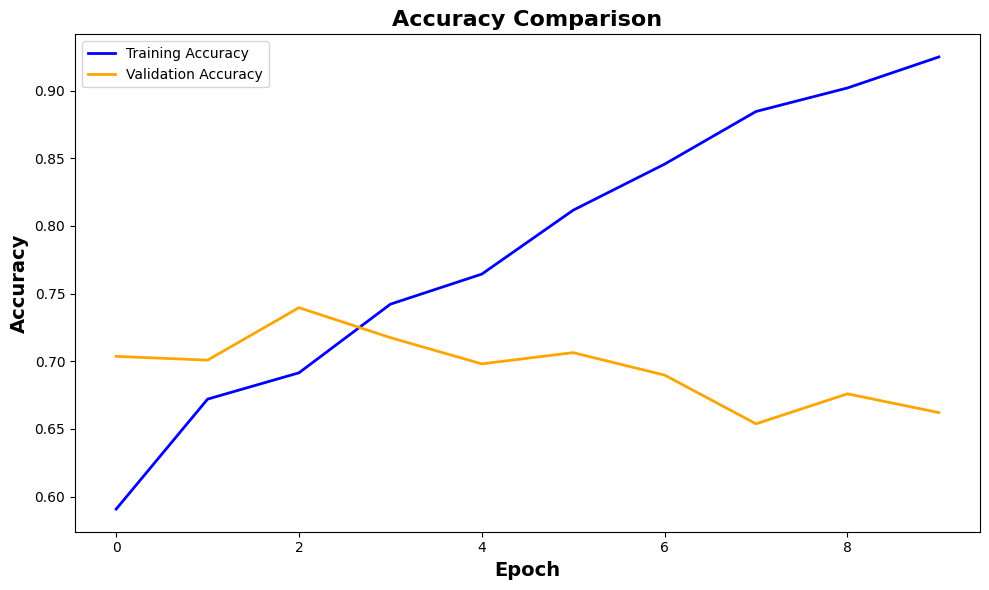

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training and validation accuracy
def plot_accuracy(history, title="Model Accuracy"):
    plt.figure(figsize=(10, 6))

    # Plot training and validation accuracy
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)

    # Customize the plot
    plt.title('Accuracy Comparison', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch', fontsize=14, fontweight='bold')
    plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
    plt.legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Call the function to plot accuracy
plot_accuracy(history_simple_cnn)


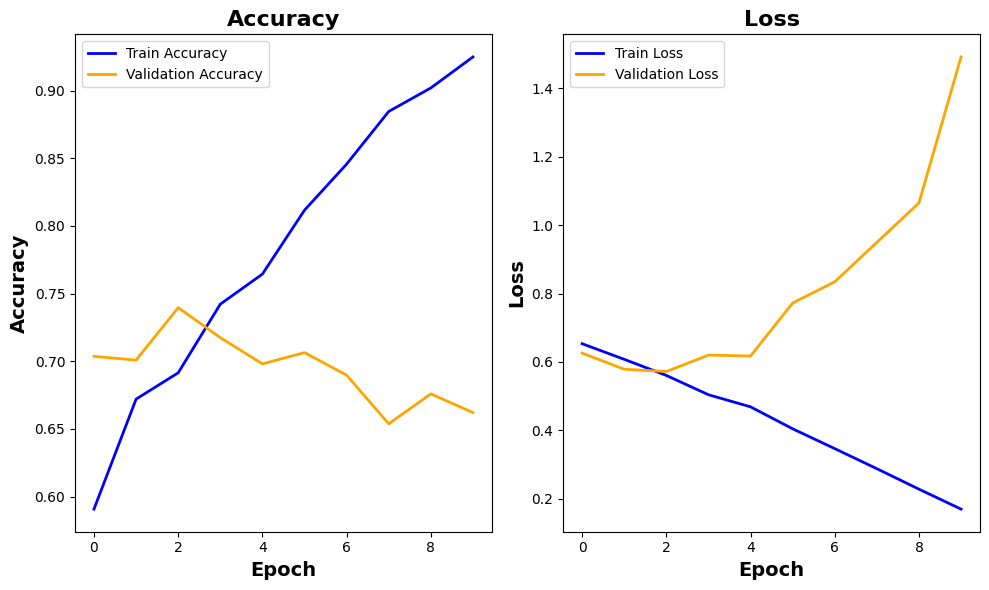

In [ ]:
# Function to plot training history
def plot_history(history, title="Model Training History"):
    plt.figure(figsize=(10, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)
    plt.title('Accuracy', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch', fontsize=14, fontweight='bold')
    plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', color='blue', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
    plt.title('Loss', fontsize=16, fontweight='bold')
    plt.xlabel('Epoch', fontsize=14, fontweight='bold')
    plt.ylabel('Loss', fontsize=14, fontweight='bold')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the history of the Simple CNN model
plot_history(history_simple_cnn)


In [ ]:
# -----------------------
# 4. MobileNetV2 Model
# -----------------------
mobilenetv2_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
mobilenetv2_model = Sequential([
    mobilenetv2_base,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes
])

mobilenetv2_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_mobilenetv2 = mobilenetv2_model.fit(train_generator, epochs=10, validation_data=train_generator.validation_data())


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
 3/45 ━━━━━━━━━━━━━━━━━━━━ 5:25 8s/step - accuracy: 0.3976 - loss: 6.8602Error processing image /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg: cannot identify image file <_io.BytesIO object at 0x7b8686cb4040>
45/45 ━━━━━━━━━━━━━━━━━━━━ 412s 8s/step - accuracy: 0.5891 - loss: 3.7931 - val_accuracy: 0.4986 - val_loss: 19.1094
Epoch 2/10
 1/45 ━━━━━━━━━━━━━━━━━━━━ 10:03 14s/step - accuracy: 0.7500 - loss: 0.4706Error processing image /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg: cannot identify image file <_io.BytesIO object at 0x7b867ef5ea20>
45/45 ━━━━━━━━━━━━━━━━━━━━ 376s 8s/step - accuracy: 0.7866 - loss: 0.4710 - val_accuracy: 0.4820 - val_loss: 30.7238
Epoch 3/10
Error processing image /content/drive/MyDrive/Dataset/Metamorphic/Quartzite_images(318).jpg: cannot identify image file <_io.BytesIO object at 0x7b867e5046d0>
45/45 ━━━━━━━━━━━━━━━━━━━━ 370s 8s/step - accuracy: 0.8000 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


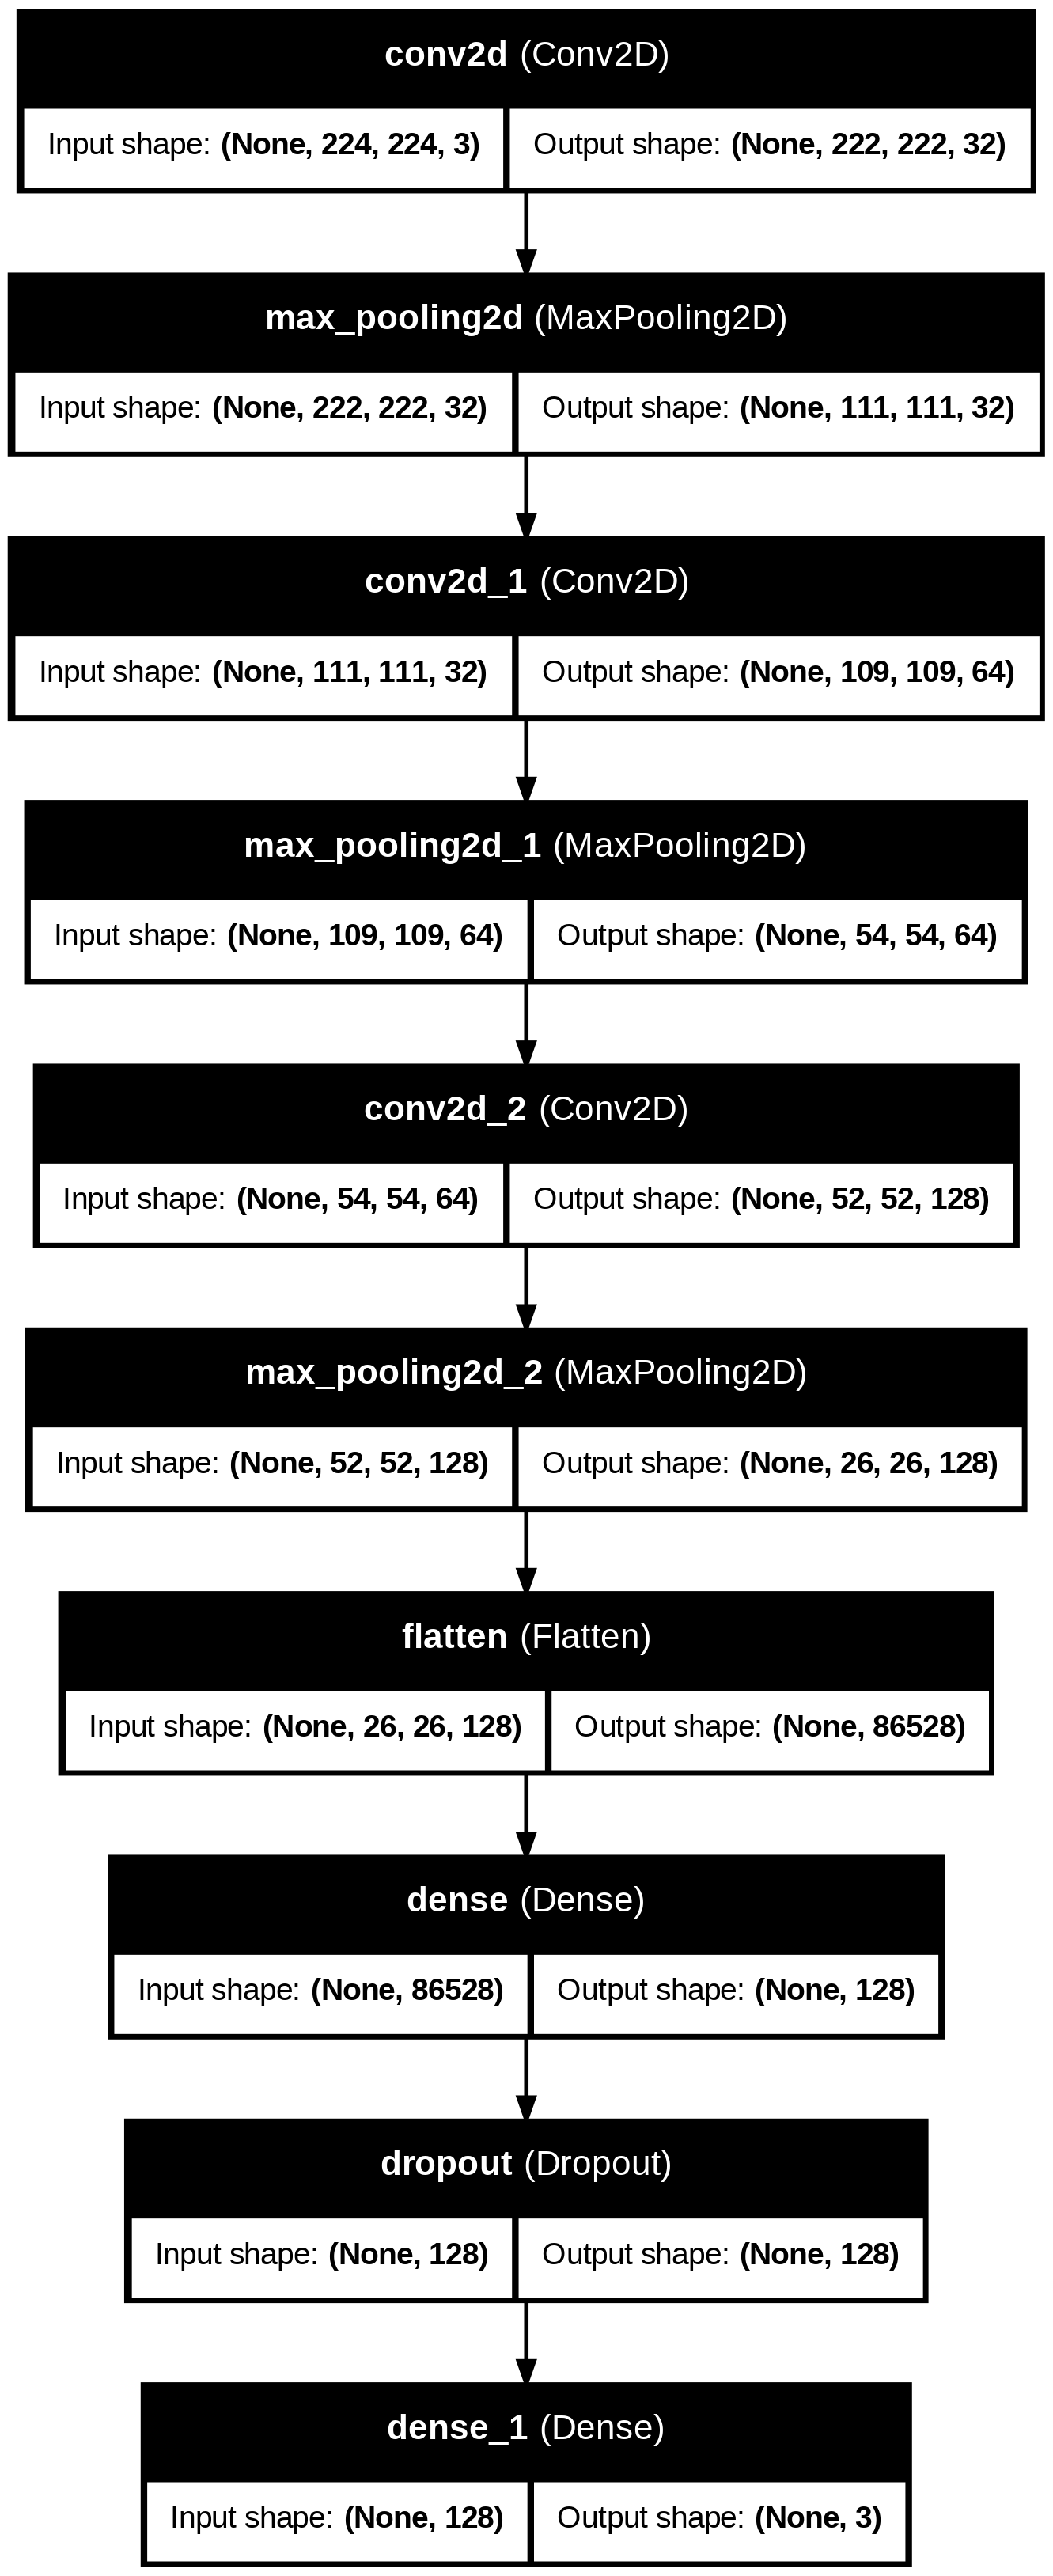

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model

# Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Visualize Model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
